# Run ArchR

Run dimensionality reduction and downstream analyses.

In [1]:
library(ArchR)
library(patchwork)
library(scattermore)
library(scales)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [2]:
set.seed(1)
addArchRThreads(threads = 32) 

Setting default number of Parallel threads to 32.



In [3]:
addArchRGenome("hg38")

Setting default genome to Hg38.



In [4]:
ArrowFiles = c('/srv/scratch/surag/scMultiome-reprog/arrow/D1M.arrow',
               '/srv/scratch/surag/scMultiome-reprog/arrow/D2M.arrow',
              '/srv/scratch/surag/scATAC-reprog/arrow/D2.arrow')

In [32]:
proj <- ArchRProject(
  ArrowFiles = paste(ArrowFiles, sep=''), 
  outputDirectory = "/srv/scratch/surag/scMultiome-reprog/arrow/with_ATAC_D2",
  copyArrows = FALSE #This is recommened so that you maintain an unaltered copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg38)!

Using GeneAnnotation set by addArchRGenome(Hg38)!

Validating Arrows...

Getting SampleNames...



Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,-

In [33]:
getAvailableMatrices(proj)

[1] "GeneScoreMatrix" "TileMatrix"

In [34]:
# Metadata file for scATAC
# should contain, sample_barcode as rowname, sample, umap1, umap2, cluster
scatac_metaData = read.table("../20200206_pmat_snapATAC/sessions/20210717_n62599/metadata.tsv", header = T)
rownames(scatac_metaData) = paste(scatac_metaData$sample, scatac_metaData$barcode, sep='_')
scatac_metaData$cells = rownames(scatac_metaData)
dim(scatac_metaData)
head(scatac_metaData, 5)

[1] 62599     6

barcode          sample umap1      umap2     cluster
D0_AAACACGCTAGTACGG AAACACGCTAGTACGG D0     -1.8037916 -9.507773 1      
D0_AAACACGCTCTTCAAG AAACACGCTCTTCAAG D0      0.7074551 -9.406457 1      
D0_AAACACGCTGATCCAT AAACACGCTGATCCAT D0     -2.9559933 -7.641148 1      
D0_AAACCCTGACCGCTAG AAACCCTGACCGCTAG D0     -3.6119107 -8.443144 1      
D0_AAACCCTGATTGCAGT AAACCCTGATTGCAGT D0      0.5002119 -8.759449 3      
                    cells              
D0_AAACACGCTAGTACGG D0_AAACACGCTAGTACGG
D0_AAACACGCTCTTCAAG D0_AAACACGCTCTTCAAG
D0_AAACACGCTGATCCAT D0_AAACACGCTGATCCAT
D0_AAACCCTGACCGCTAG D0_AAACCCTGACCGCTAG
D0_AAACCCTGATTGCAGT D0_AAACCCTGATTGCAGT

In [35]:
min(proj$nFrags)
min(proj$TSSEnrichment)

[1] 1000

[1] 4.004

In [36]:
proj = proj[proj$TSSEnrichment>6, ]

In [37]:
min(proj$nFrags)
min(proj$TSSEnrichment)

[1] 1000

[1] 6.002

In [38]:
table(proj$Sample)


 D1M   D2  D2M 
5618 9688 7796 

In [39]:
# are all previously selected scATAC cell present?
sum(scatac_metaData$sample=="D2")
all(paste("D2", scatac_metaData[scatac_metaData$sample=="D2", "barcode"], sep="#") %in% proj$cellNames[proj$Sample=="D2"])

[1] 6559

[1] TRUE

In [ ]:
# remove D2 scATAC cells that didn't eventually make it

In [40]:
proj = proj[proj$cellNames %in% c(proj$cellNames[proj$Sample=="D1M"], 
                                  proj$cellNames[proj$Sample=="D2M"], 
                                  paste("D2", scatac_metaData[scatac_metaData$sample=="D2", "barcode"], sep="#")), ]

In [41]:
table(proj$Sample)


 D1M   D2  D2M 
5618 6559 7796 

In [42]:
proj <- addIterativeLSI(ArchRProj = proj, iterations = 4, force=T, useMatrix = "TileMatrix", name = "IterativeLSI")

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-196eb168bca00-Date-2022-06-07_Time-22-51-55.log
If there is an issue, please report to github with logFile!

2022-06-07 22:51:56 : Computing Total Across All Features, 0.002 mins elapsed.

2022-06-07 22:52:01 : Computing Top Features, 0.077 mins elapsed.

###########
2022-06-07 22:52:02 : Running LSI (1 of 4) on Top Features, 0.096 mins elapsed.
###########

2022-06-07 22:52:02 : Sampling Cells (N = 10001) for Estimated LSI, 0.097 mins elapsed.

2022-06-07 22:52:02 : Creating Sampled Partial Matrix, 0.098 mins elapsed.

2022-06-07 22:52:27 : Computing Estimated LSI (projectAll = FALSE), 0.52 mins elapsed.

2022-06-07 22:54:13 : Identifying Clusters, 2.284 mins elapsed.

2022-06-07 22:54:47 : Identified 6 Clusters, 2.855 mins elapsed.

2022-06-07 22:54:47 : Saving LSI Iteration, 2.856 mins elapsed.

2022-06-07 22:55:07 : Creating Cluster Matrix on the total Group Features, 3.187 mins elapsed.

2022-06-07 22:55:18 : C

In [43]:
proj <- addClusters(input = proj, reducedDims = "IterativeLSI")

ArchR logging to : ArchRLogs/ArchR-addClusters-196eb1671782b-Date-2022-06-07_Time-23-03-09.log
If there is an issue, please report to github with logFile!

2022-06-07 23:03:10 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19973
Number of edges: 784025

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8420
Number of communities: 14
Elapsed time: 4 seconds


2022-06-07 23:03:57 : Testing Outlier Clusters, 0.776 mins elapsed.

2022-06-07 23:03:57 : Assigning Cluster Names to 14 Clusters, 0.777 mins elapsed.

2022-06-07 23:03:57 : Finished addClusters, 0.779 mins elapsed.



In [44]:
proj <- addUMAP(ArchRProj = proj, reducedDims = "IterativeLSI", force=T)

23:03:57 UMAP embedding parameters a = 0.7669 b = 1.223

23:03:57 Read 19973 rows and found 30 numeric columns

23:03:57 Using Annoy for neighbor search, n_neighbors = 40

23:03:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

23:04:01 Writing NN index file to temp file /tmp/RtmpuTNIQx/file196eb244dc28b

23:04:01 Searching Annoy index using 28 threads, search_k = 4000

23:04:02 Annoy recall = 100%

23:04:03 Commencing smooth kNN distance calibration using 28 threads

23:04:05 Initializing from normalized Laplacian + noise

23:04:05 Commencing optimization for 200 epochs, with 1262934 positive edges

23:04:19 Optimization finished

23:04:19 Creating temp model dir /tmp/RtmpuTNIQx/dir196eb1d111e92

23:04:19 Creating dir /tmp/RtmpuTNIQx/dir196eb1d111e92

23:04:21 Chang

In [45]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-196eb1dd8d2a-Date-2022-06-07_Time-23-04-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-196eb1dd8d2a-Date-2022-06-07_Time-23-04-22.log



In [46]:
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-196eb48d903d6-Date-2022-06-07_Time-23-04-24.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-196eb48d903d6-Date-2022-06-07_Time-23-04-24.log



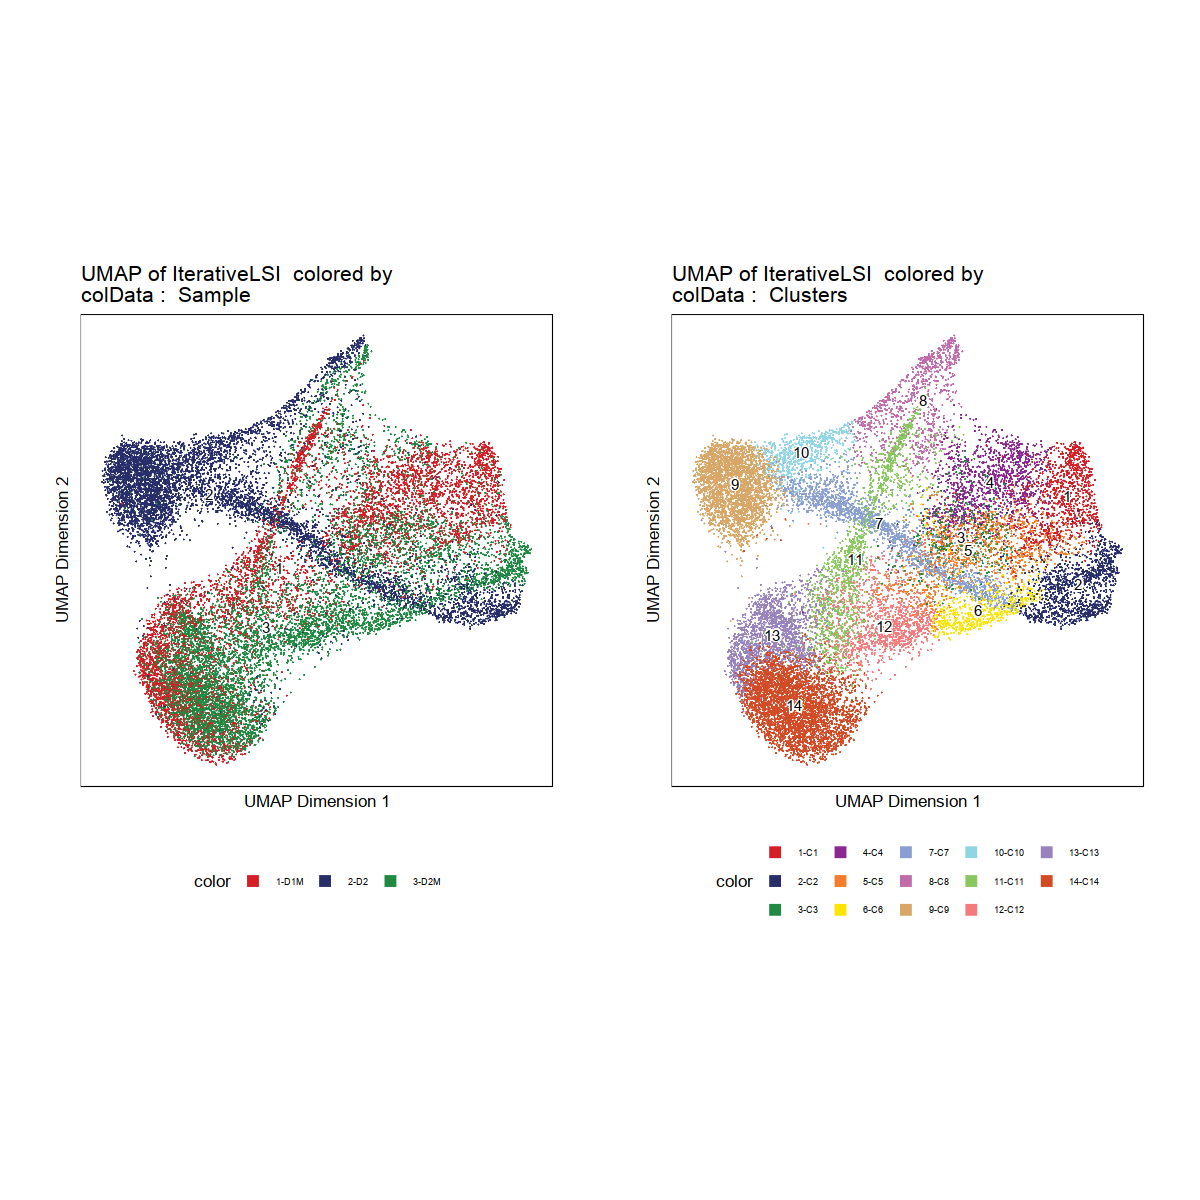

In [47]:
options(repr.plot.width = 10, repr.plot.height = 10)

p1 | p2

In [56]:
d2_scatac = scatac_metaData[scatac_metaData$sample=="D2",]
rownames(d2_scatac) = d2_scatac$barcode

umap_coords = proj@embeddings$UMAP[[1]]
colnames(umap_coords) = c("umap1", "umap2")
umap_coords$sample = unlist(lapply(strsplit(rownames(umap_coords), "#"), "[[", 1))
umap_coords$barcode = unlist(lapply(strsplit(rownames(umap_coords), "#"), "[[", 2))
umap_coords$cluster = d2_scatac[umap_coords$barcode, "cluster"]
umap_coords$cluster[umap_coords$sample=="D1M"]= "D1M"
umap_coords$cluster[umap_coords$sample=="D2M"]= "D2M"
umap_coords = umap_coords[!is.na(umap_coords$cluster), ]
umap_coords = umap_coords[sample(nrow(umap_coords)), ]

umap_coords = umap_coords[umap_coords$cluster %in% names(table(umap_coords$cluster)[table(umap_coords$cluster)>100]), ] # remove D2 clusters with few cells
tail(umap_coords)

umap1     umap2       sample
D2M#AAAAAAAACGCCTCTCTACCTGAT  4.934345 -0.01727955 D2M   
D2#AGAACGCGATCATTTC          -3.517105  3.16091319 D2    
D2M#AAAAAAAAGTCCTAACTGTGAGAC -4.048595 -3.77352898 D2M   
D2#GGCGCAACTTGCGTGC          -2.616780  2.59988681 D2    
D2#GTAATCTCTATCCGTA          -5.393757  3.16838689 D2    
D1M#AAAAAAAAGAATATCGAAGTGATT -2.181666 -5.82487623 D1M   
                             barcode                  cluster
D2M#AAAAAAAACGCCTCTCTACCTGAT AAAAAAAACGCCTCTCTACCTGAT D2M    
D2#AGAACGCGATCATTTC          AGAACGCGATCATTTC         3      
D2M#AAAAAAAAGTCCTAACTGTGAGAC AAAAAAAAGTCCTAACTGTGAGAC D2M    
D2#GGCGCAACTTGCGTGC          GGCGCAACTTGCGTGC         3      
D2#GTAATCTCTATCCGTA          GTAATCTCTATCCGTA         3      
D1M#AAAAAAAAGAATATCGAAGTGATT AAAAAAAAGAATATCGAAGTGATT D1M

In [57]:
table(umap_coords$cluster)


   1   11   13   15    2    3  D1M  D2M 
 272 1059 1502 1123  341 2122 5618 7796 

In [58]:
names(table(umap_coords$cluster)[table(umap_coords$cluster)>100] )

[1] "1"   "11"  "13"  "15"  "2"   "3"   "D1M" "D2M"

In [59]:
# https://rdrr.io/github/sqjin/CellChat/src/R/visualization.R
scPalette <- function(n) {
  colorSpace <- c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#F29403','#F781BF','#BC9DCC','#A65628','#54B0E4','#222F75','#1B9E77','#B2DF8A',
                  '#E3BE00','#FB9A99','#E7298A','#910241','#00CDD1','#A6CEE3','#CE1261','#5E4FA2','#8CA77B','#00441B','#DEDC00','#B3DE69','#8DD3C7','#999999')
  if (n <= length(colorSpace)) {
    colors <- colorSpace[1:n]
  } else {
    colors <- grDevices::colorRampPalette(colorSpace)(n)
  }
  return(colors)
}

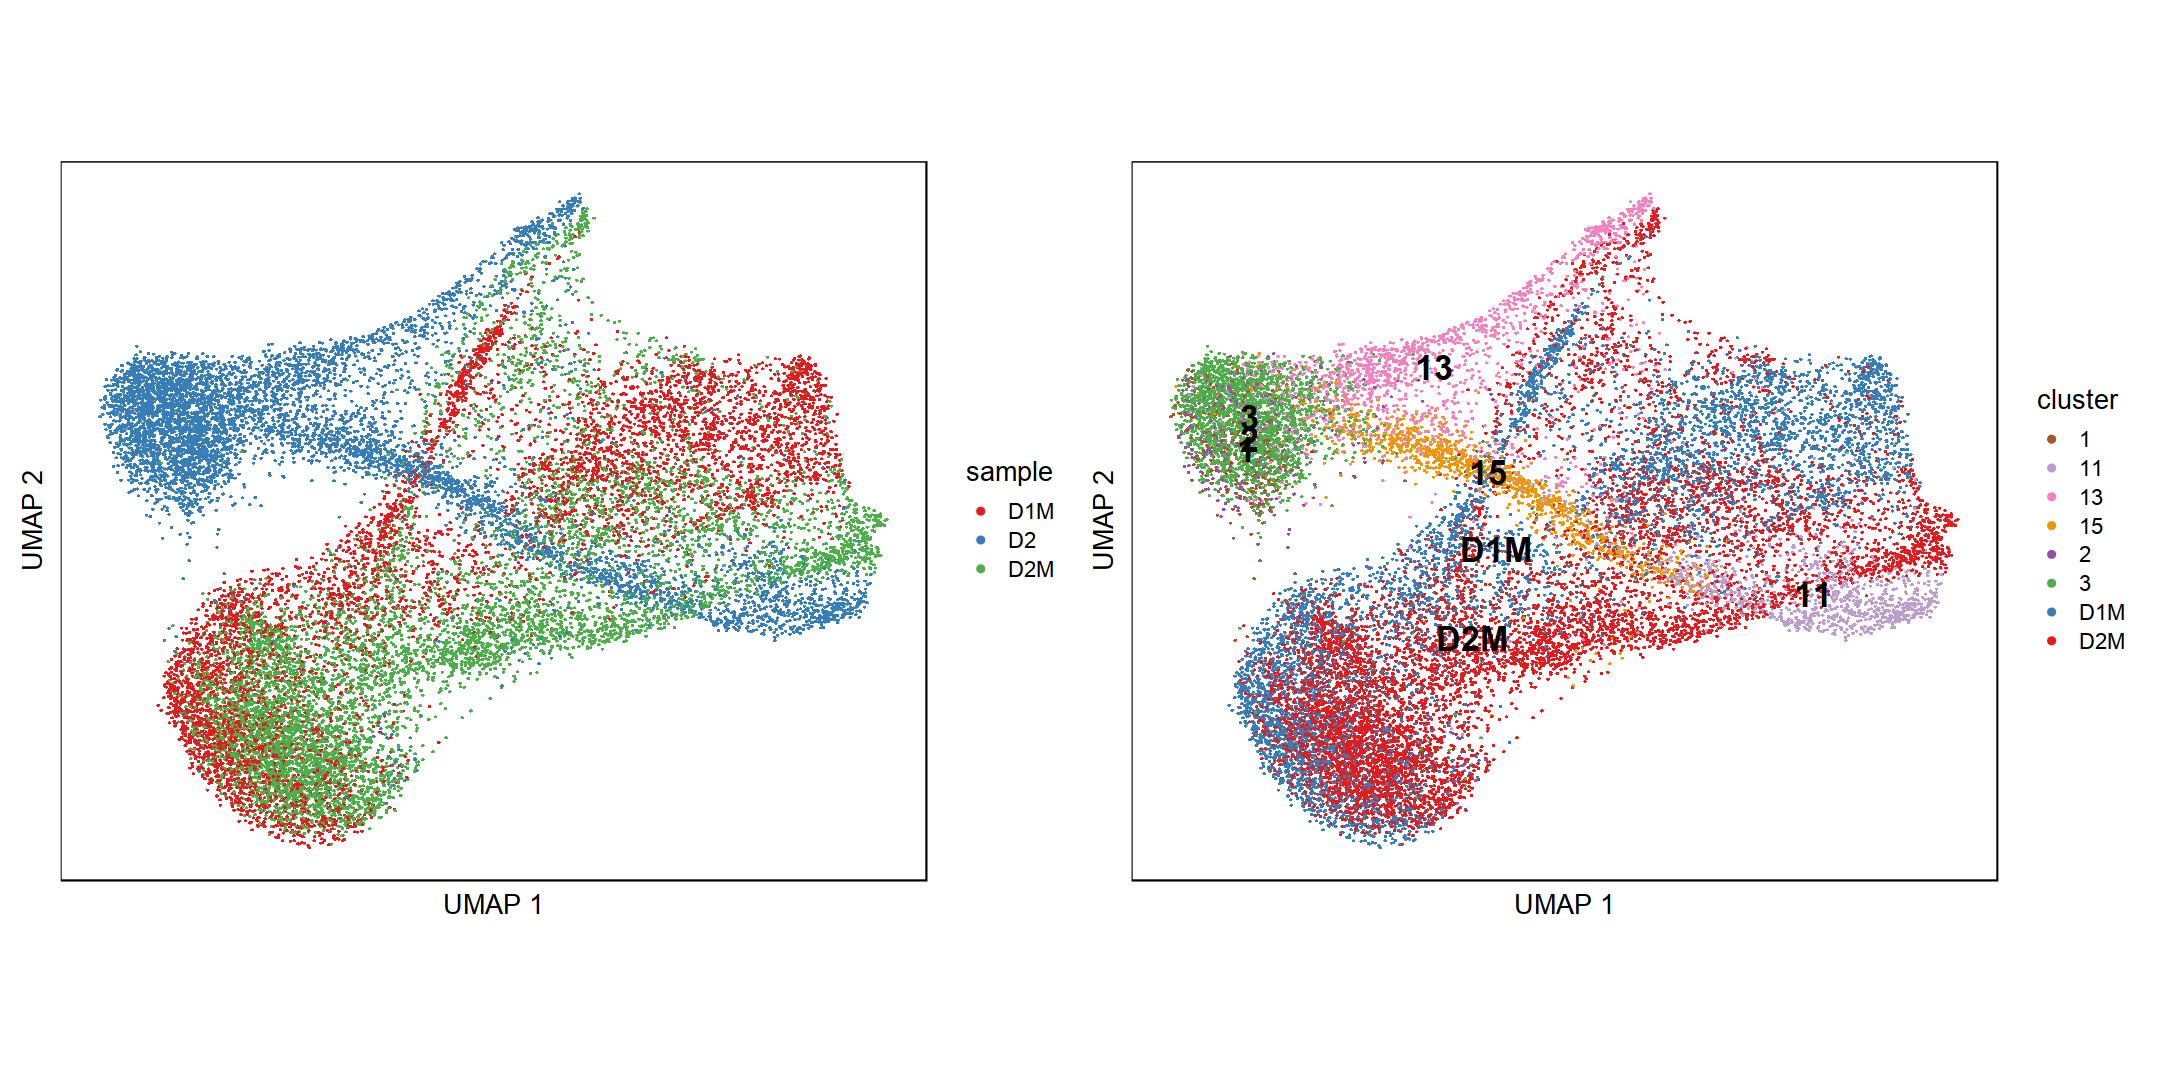

In [63]:
options(repr.plot.width = 18, repr.plot.height = 9)

p1 <- ggplot(umap_coords) +
    geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=sample), pixels=c(5000,5000)) +
    scale_color_manual(values=scPalette(length(unique(umap_coords$cluster)))) +
    # ggtitle("All Cells (Day)") + 
    theme_classic(base_size=16) +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          )

p2 <- ggplot(umap_coords) +
    geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=cluster), pixels=c(5000,5000)) +
    scale_color_manual(values=rev(scPalette(length(unique(umap_coords$cluster))))) +
    # ggtitle("All Cells (Day)") + 
    theme_classic(base_size=16) +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          ) +
geom_text(data=data.frame(aggregate(umap_coords[,c("umap1","umap2")], 
                                    list(umap_coords$cluster), median)),
         aes(x=umap1, y=umap2, label=Group.1), fontface = "bold", size=7) +
    coord_fixed()

p1 | p2

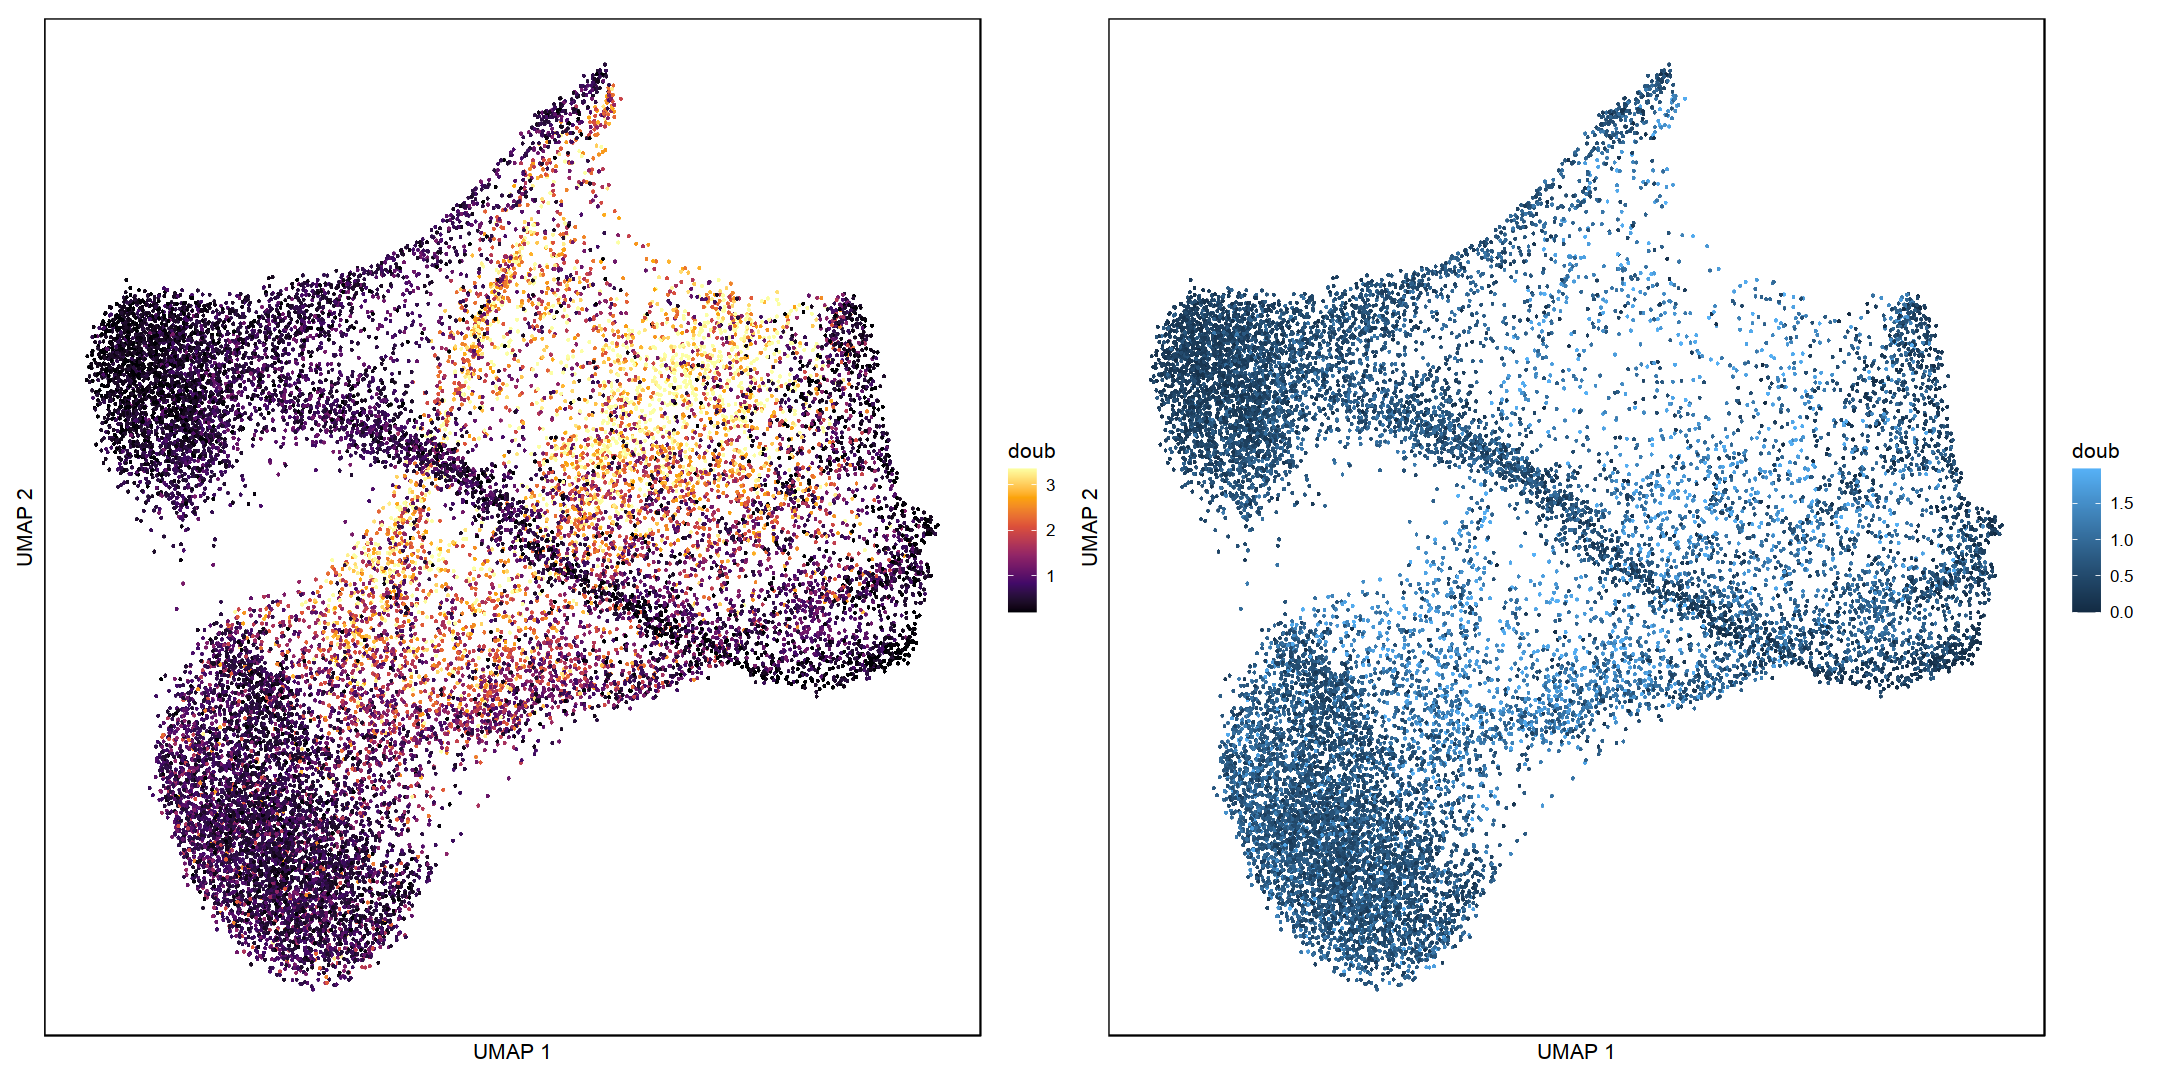

In [64]:
options(repr.plot.width = 18, repr.plot.height = 9)

# doublet scores
umap_coords = proj@embeddings$UMAP[[1]]
colnames(umap_coords) = c("umap1", "umap2")
umap_coords$sample = unlist(lapply(strsplit(rownames(umap_coords), "#"), "[[", 1))
umap_coords$doub = proj$DoubletEnrichment

p1 = ggplot(umap_coords) +
    geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=doub), pixels=c(5000,5000)) +
    # ggtitle("All Cells (Day)") + 
    scale_color_viridis_c(limits=c(quantile(umap_coords$doub, 0.05), 
                               quantile(umap_coords$doub, 0.95)), 
                      oob=squish, option = "B") +


    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          ) 

p2 = ggplot(umap_coords[umap_coords$doub < 2, ]) +
    geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=doub), pixels=c(5000,5000)) +
    # ggtitle("All Cells (Day)") + 

    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          ) 

p1 | p2

In [65]:
# this includes those called with additional knee point 
d1m_amulet_final_doub = paste("D1M", as.character(unlist(read.table("../20220603_Multiome_AMULET/outs/20220607_w_knee_point/D1M_doublet.txt")$V1)), sep='#')
d2m_amulet_final_doub = paste("D2M", as.character(unlist(read.table("../20220603_Multiome_AMULET/outs/20220607_w_knee_point/D2M_doublet.txt")$V1)), sep='#')

In [66]:
length(d1m_amulet_final_doub)
length(d2m_amulet_final_doub)

[1] 859

[1] 972

In [67]:
head(umap_coords)

umap1    umap2    sample doub
D1M#AAAAAAAACTGAGGATGGGTGTAA 5.483370 3.103356 D1M    3.88
D1M#AAAAAAAACAAGGCTACGTCCATC 8.144965 2.359305 D1M    0.72
D1M#AAAAAAAAGTTGAGCGAACACAAT 5.817984 3.577975 D1M    2.44
D1M#AAAAAAAAGTAAGCTACCCTCCTT 6.063336 3.749829 D1M    2.84
D1M#AAAAAAAAGGTTATGACCGGCTAA 6.056858 3.240912 D1M    5.64
D1M#AAAAAAAACGATCCGTGTGCTGGC 4.959256 3.033516 D1M    3.68

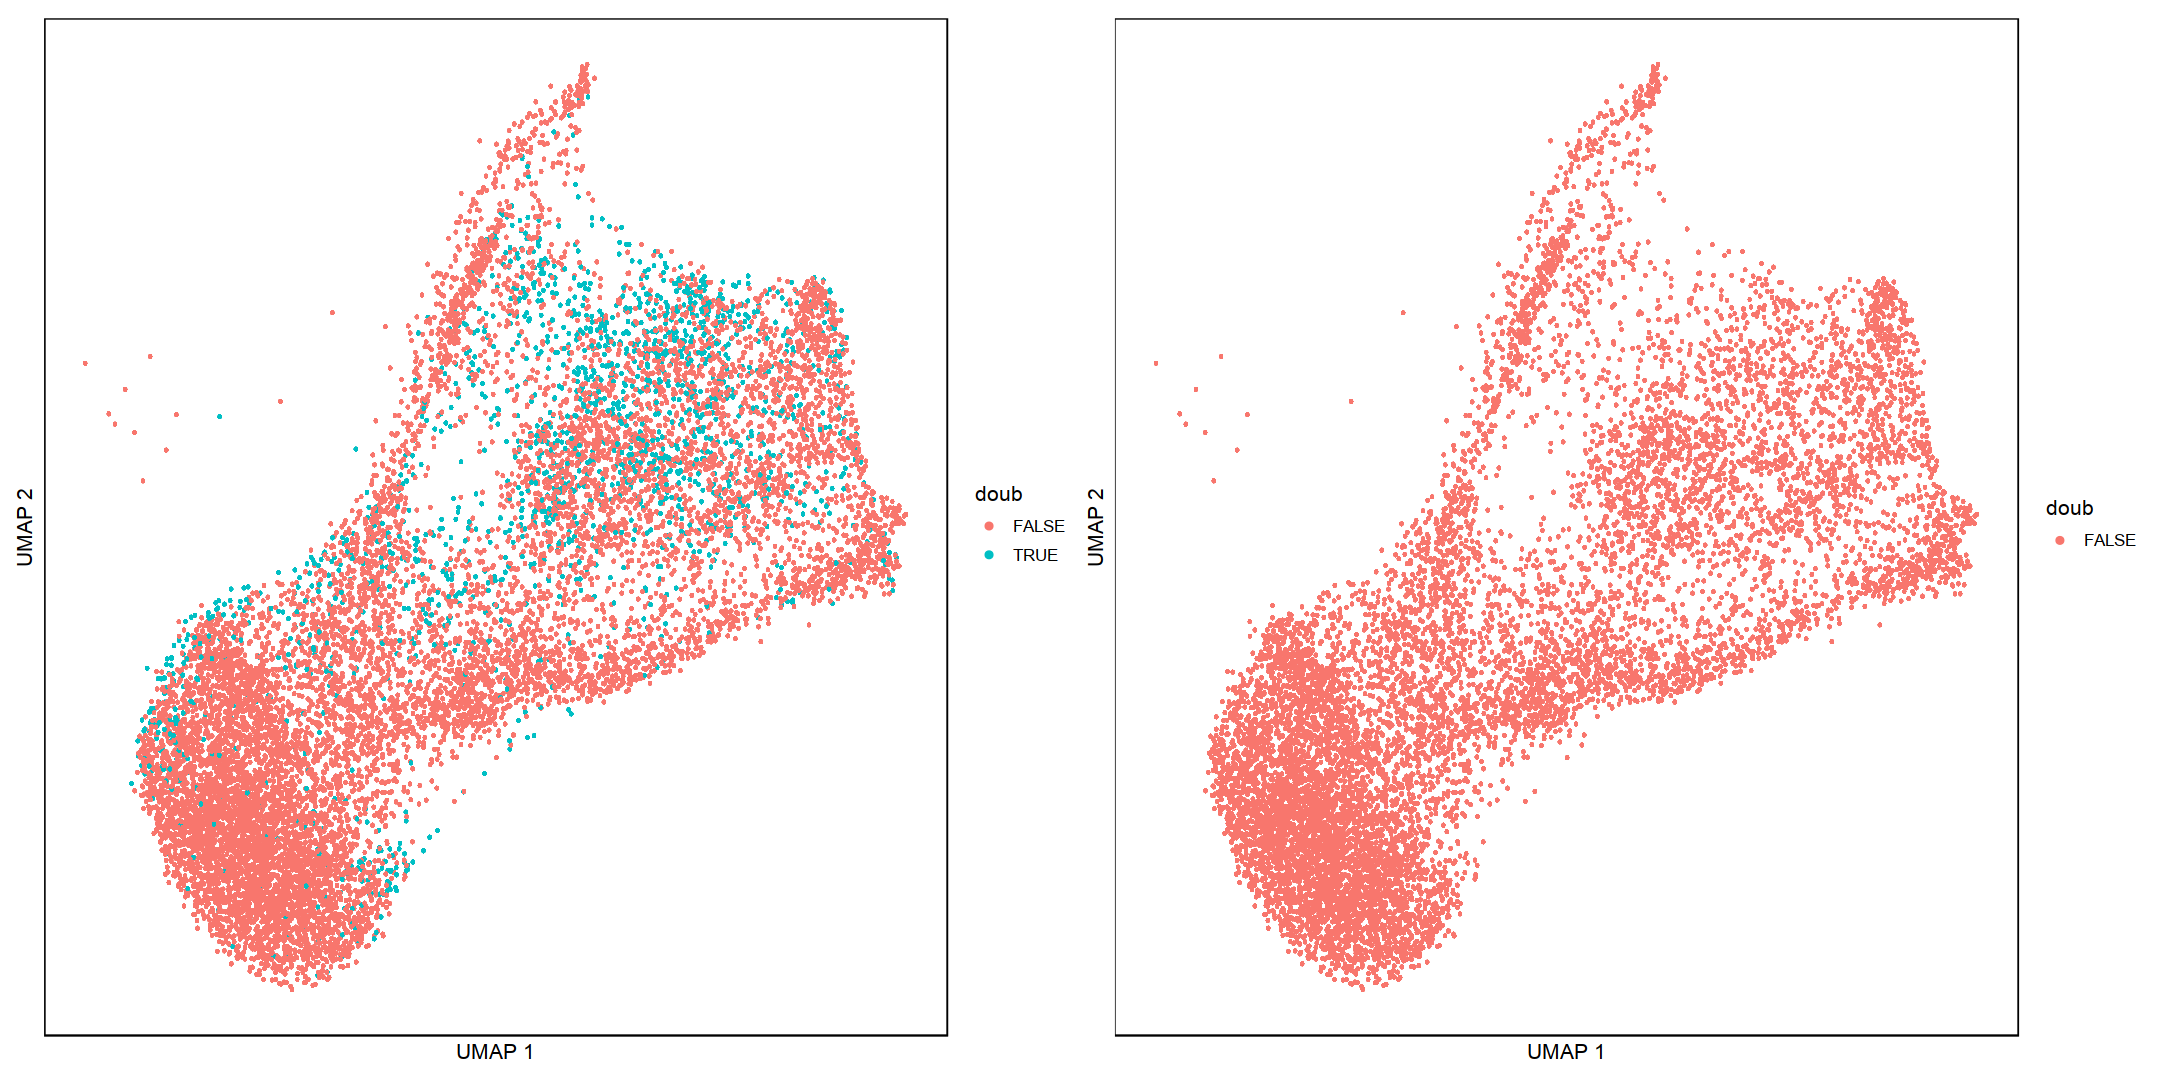

In [68]:
options(repr.plot.width = 18, repr.plot.height = 9)

# doublet scores
umap_coords = proj@embeddings$UMAP[[1]]
colnames(umap_coords) = c("umap1", "umap2")
umap_coords$sample = unlist(lapply(strsplit(rownames(umap_coords), "#"), "[[", 1))
umap_coords = umap_coords[umap_coords$sample %in% c("D1M", "D2M"), ]
umap_coords$doub = rownames(umap_coords) %in% c(d1m_amulet_final_doub, d2m_amulet_final_doub)

p1 = ggplot(umap_coords) +
    geom_scattermore(pointsize=13, aes(x=umap1 , y=umap2, col=doub), pixels=c(5000,5000)) +
    # ggtitle("All Cells (Day)") + 

    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          ) 

p2 = ggplot(umap_coords[umap_coords$doub==F, ]) +
    geom_scattermore(pointsize=13, aes(x=umap1 , y=umap2, col=doub), pixels=c(5000,5000)) +
    # ggtitle("All Cells (Day)") + 

    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          ) 

p1 | p2 

### Without doublets

In [70]:
proj_wo_doub = proj[!proj$cellNames %in% c(d1m_amulet_final_doub, d2m_amulet_final_doub)]
table(proj_wo_doub$Sample)


 D1M   D2  D2M 
4759 6559 6824 

In [71]:
proj_wo_doub <- addIterativeLSI(ArchRProj = proj_wo_doub, iterations = 4, force=T, useMatrix = "TileMatrix", name = "IterativeLSI")
proj_wo_doub <- addUMAP(ArchRProj = proj_wo_doub, reducedDims = "IterativeLSI", force=T)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-196eb7dfc0068-Date-2022-06-07_Time-23-33-07.log
If there is an issue, please report to github with logFile!

2022-06-07 23:33:09 : Computing Total Across All Features, 0.004 mins elapsed.

2022-06-07 23:33:11 : Computing Top Features, 0.026 mins elapsed.

###########
2022-06-07 23:33:12 : Running LSI (1 of 4) on Top Features, 0.051 mins elapsed.
###########

2022-06-07 23:33:12 : Sampling Cells (N = 10002) for Estimated LSI, 0.052 mins elapsed.

2022-06-07 23:33:12 : Creating Sampled Partial Matrix, 0.053 mins elapsed.

2022-06-07 23:33:24 : Computing Estimated LSI (projectAll = FALSE), 0.244 mins elapsed.

2022-06-07 23:34:48 : Identifying Clusters, 1.658 mins elapsed.

2022-06-07 23:35:21 : Identified 6 Clusters, 2.203 mins elapsed.

2022-06-07 23:35:21 : Saving LSI Iteration, 2.203 mins elapsed.

2022-06-07 23:35:40 : Creating Cluster Matrix on the total Group Features, 2.522 mins elapsed.

2022-06-07 23:35:51 : 

In [78]:
umap_coords = proj_wo_doub@embeddings$UMAP[[1]]
colnames(umap_coords) = c("umap1", "umap2")
umap_coords$sample = unlist(lapply(strsplit(rownames(umap_coords), "#"), "[[", 1))
umap_coords$barcode = unlist(lapply(strsplit(rownames(umap_coords), "#"), "[[", 2))
umap_coords$cluster = d2_scatac[umap_coords$barcode, "cluster"]
umap_coords$cluster[umap_coords$sample=="D1M"]= "D1M"
umap_coords$cluster[umap_coords$sample=="D2M"]= "D2M"

umap_coords = umap_coords[!is.na(umap_coords$cluster), ]
umap_coords = umap_coords[sample(nrow(umap_coords)), ]

umap_coords = umap_coords[umap_coords$cluster %in% names(table(umap_coords$cluster)[table(umap_coords$cluster)>100]), ] # remove D2 clusters with few cells
tail(umap_coords)

umap1      umap2      sample
D2M#AAAAAAAAAGCTTACCTATGATGA -3.8028134  0.6566105 D2M   
D2#GAGTTACTGAACCCGC           3.8998756  2.3557966 D2    
D2M#AAAAAAAAAGGAAGCACTAGTCCT -1.7630690 -1.0867600 D2M   
D2#GCGTAAGGACGGTACC           3.9913573  2.9432478 D2    
D2M#AAAAAAAATATGTCCACGCAAGCC  0.6401594 -2.1307392 D2M   
D2M#AAAAAAAACGTAGTAGAGGTAATT  0.9333365 -5.8950643 D2M   
                             barcode                  cluster
D2M#AAAAAAAAAGCTTACCTATGATGA AAAAAAAAAGCTTACCTATGATGA D2M    
D2#GAGTTACTGAACCCGC          GAGTTACTGAACCCGC         3      
D2M#AAAAAAAAAGGAAGCACTAGTCCT AAAAAAAAAGGAAGCACTAGTCCT D2M    
D2#GCGTAAGGACGGTACC          GCGTAAGGACGGTACC         13     
D2M#AAAAAAAATATGTCCACGCAAGCC AAAAAAAATATGTCCACGCAAGCC D2M    
D2M#AAAAAAAACGTAGTAGAGGTAATT AAAAAAAACGTAGTAGAGGTAATT D2M

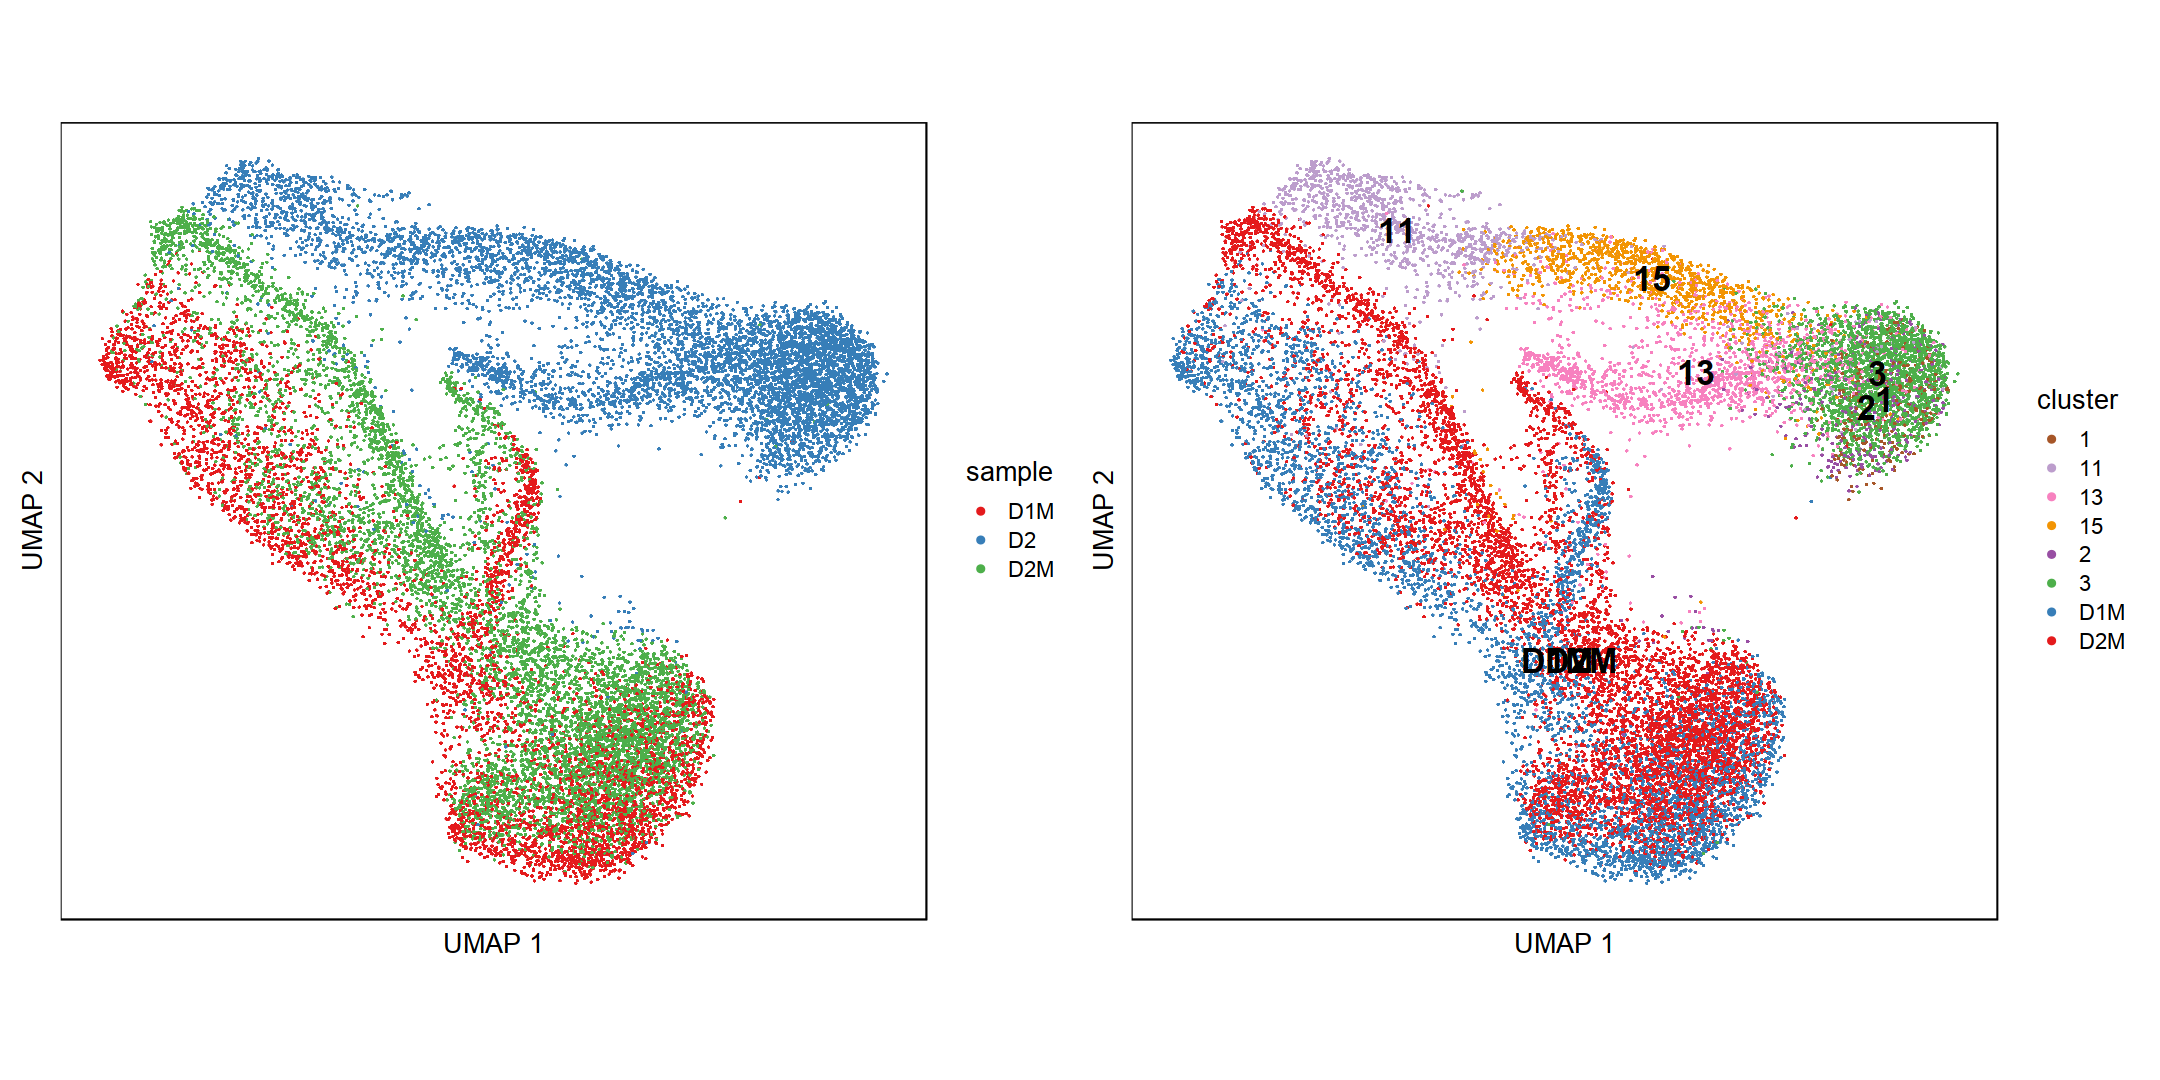

In [73]:
options(repr.plot.width = 18, repr.plot.height = 9)

p1 <- ggplot(umap_coords) +
    geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=sample), pixels=c(5000,5000)) +
    scale_color_manual(values=scPalette(length(unique(umap_coords$cluster)))) +
    # ggtitle("All Cells (Day)") + 
    theme_classic(base_size=16) +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          )

p2 <- ggplot(umap_coords) +
    geom_scattermore(pointsize=10, aes(x=umap1 , y=umap2, col=cluster), pixels=c(5000,5000)) +
    scale_color_manual(values=rev(scPalette(length(unique(umap_coords$cluster))))) +
    # ggtitle("All Cells (Day)") + 
    theme_classic(base_size=16) +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          ) +
geom_text(data=data.frame(aggregate(umap_coords[,c("umap1","umap2")], 
                                    list(umap_coords$cluster), median)),
         aes(x=umap1, y=umap2, label=Group.1), fontface = "bold", size=7) +
    coord_fixed()

p1 | p2

**Write barcodes**

In [81]:
table(proj_wo_doub$Sample)


 D1M   D2  D2M 
4759 6559 6824 

In [85]:
write.table(unlist(lapply(strsplit(proj_wo_doub$cellNames[proj_wo_doub$Sample == "D1M"], "#"), "[[", 2)),
            "./barcodes/20220607_TSS6_nFrag1000_AMULET/D1M.txt", 
            row.names=F, col.names=F, quote=F)
write.table(unlist(lapply(strsplit(proj_wo_doub$cellNames[proj_wo_doub$Sample == "D2M"], "#"), "[[", 2)),
            "./barcodes/20220607_TSS6_nFrag1000_AMULET/D2M.txt", 
            row.names=F, col.names=F, quote=F)

In [74]:
proj_wo_doub <- addImputeWeights(proj_wo_doub)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-196eb6d1d4c86-Date-2022-06-07_Time-23-48-20.log
If there is an issue, please report to github with logFile!

2022-06-07 23:48:22 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [75]:
markerGenes  <- c(
    "COL1A1",
    "MAP2",
    "JAKMIP2",
    "KRT14",
    "KRT6A",
    "OAS1"
  )

p <- plotEmbedding(
    ArchRProj = proj_wo_doub, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj_wo_doub)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-196eb1ab8c070-Date-2022-06-07_Time-23-48-38.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-06-07 23:48:40 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-196eb1ab8c070-Date-2022-06-07_Time-23-48-38.log



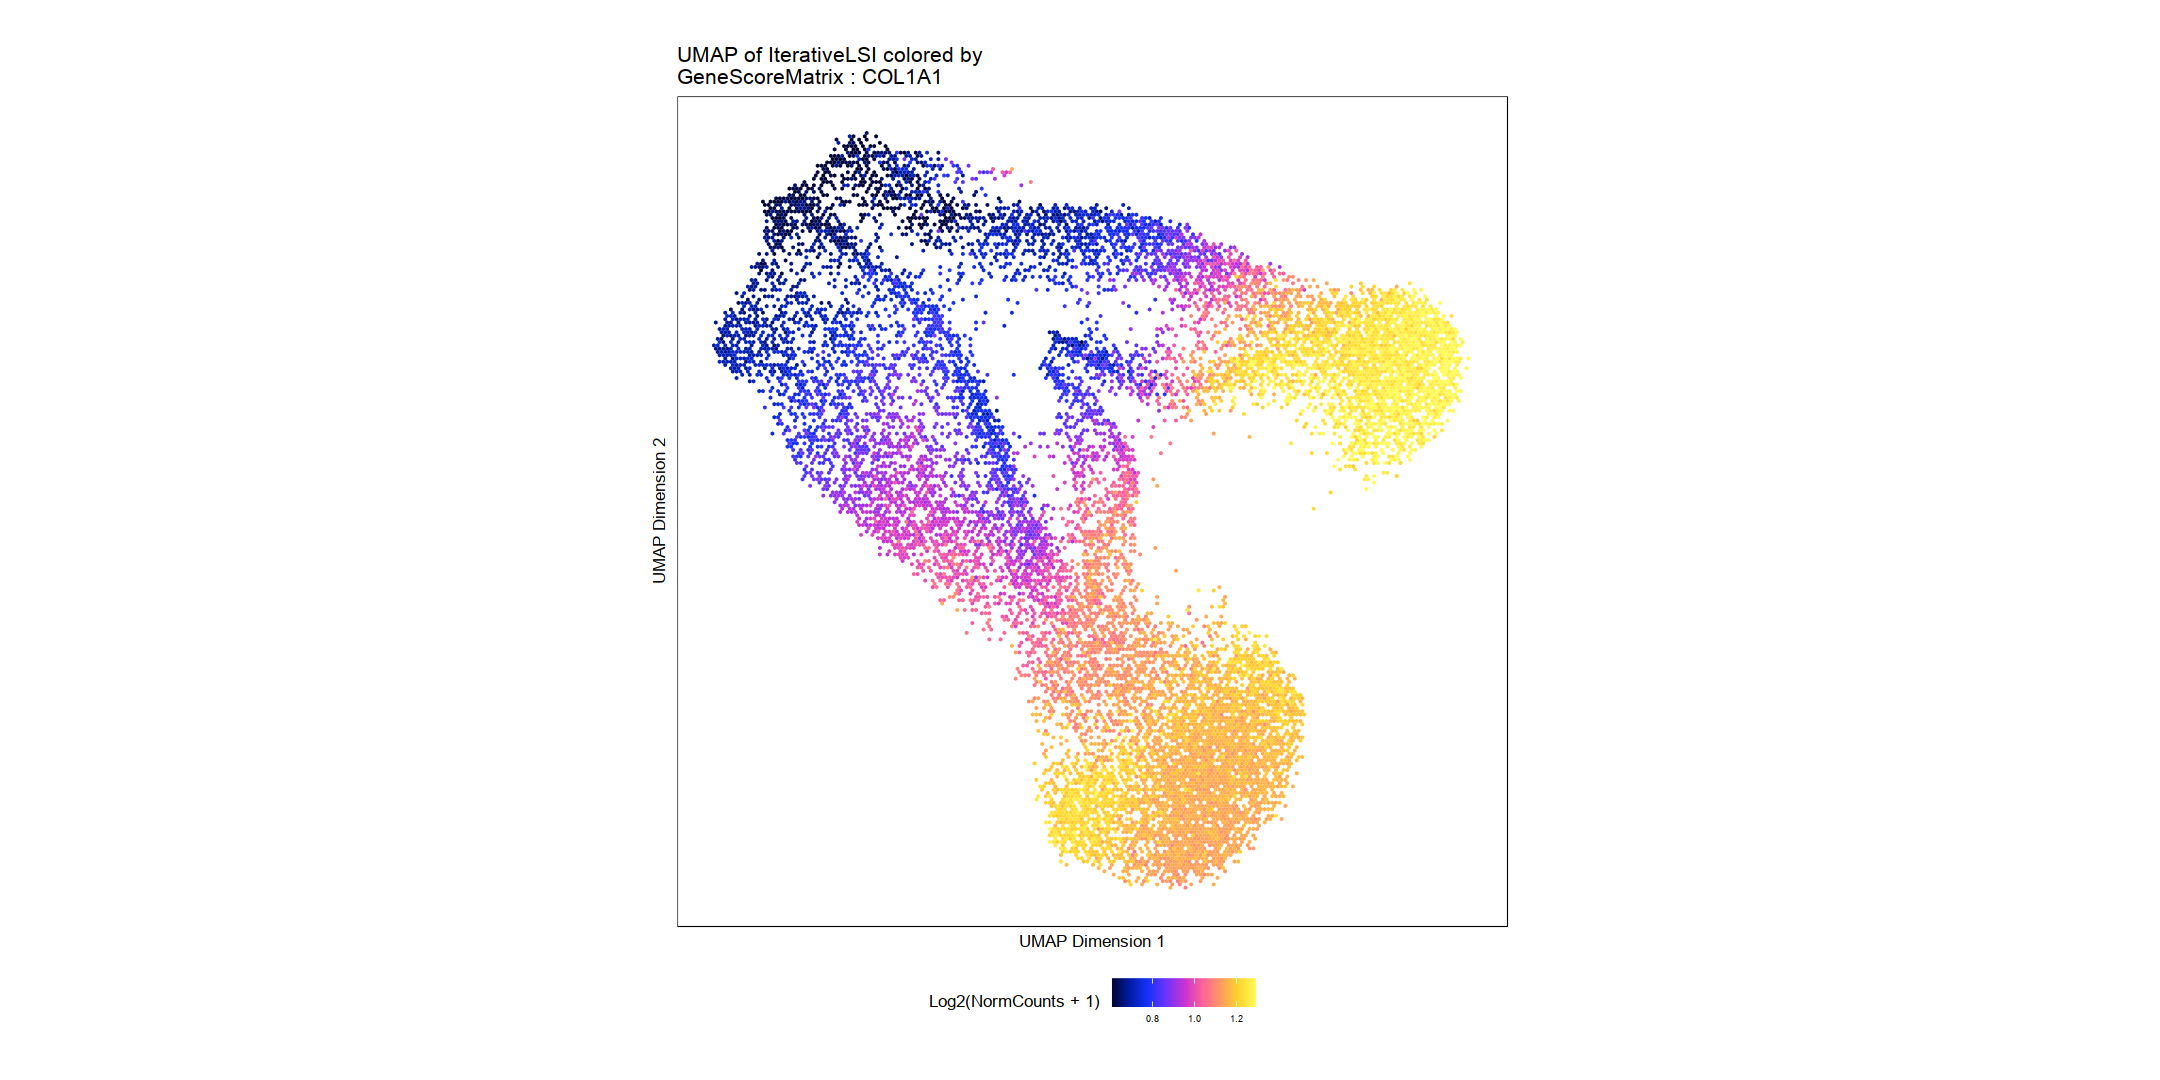

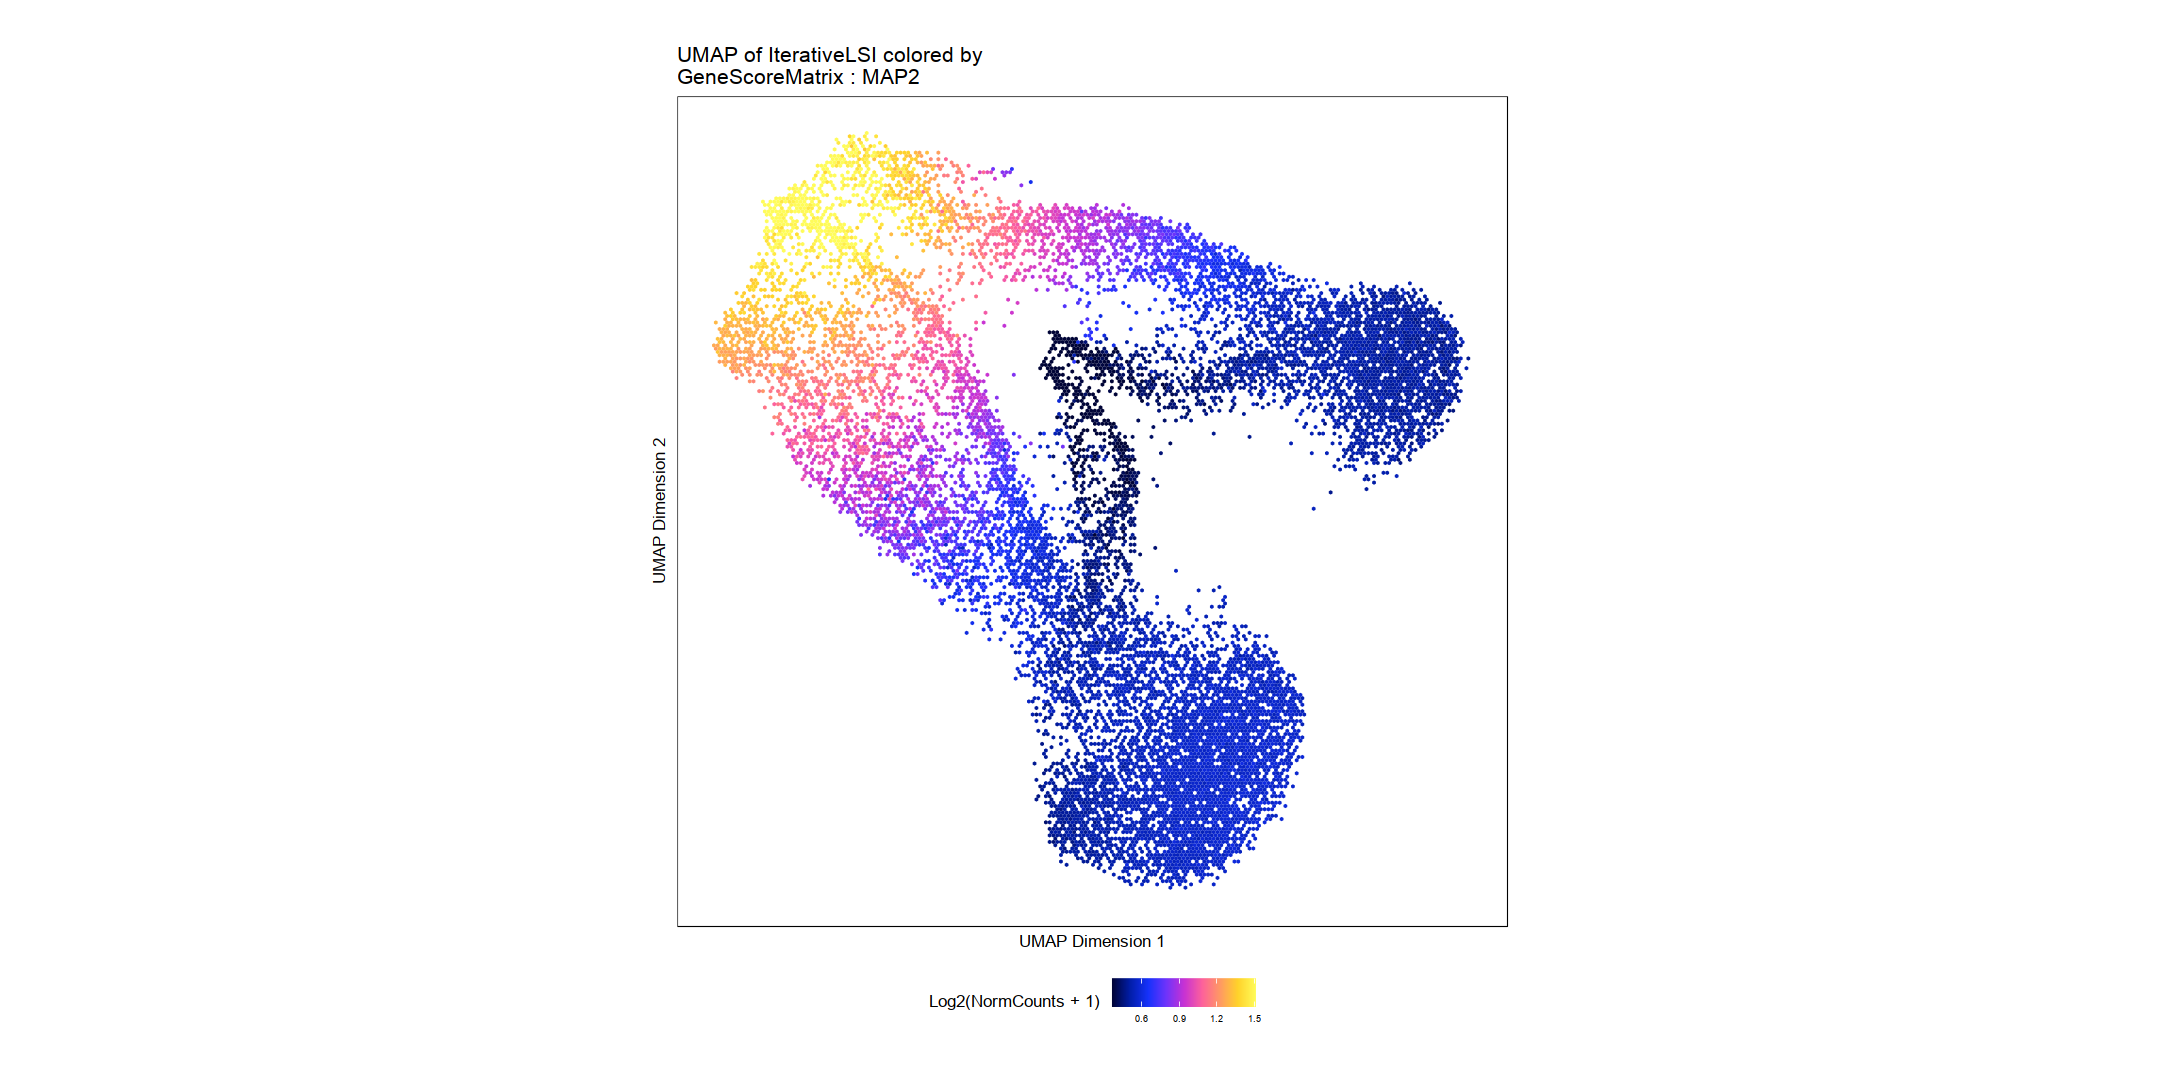

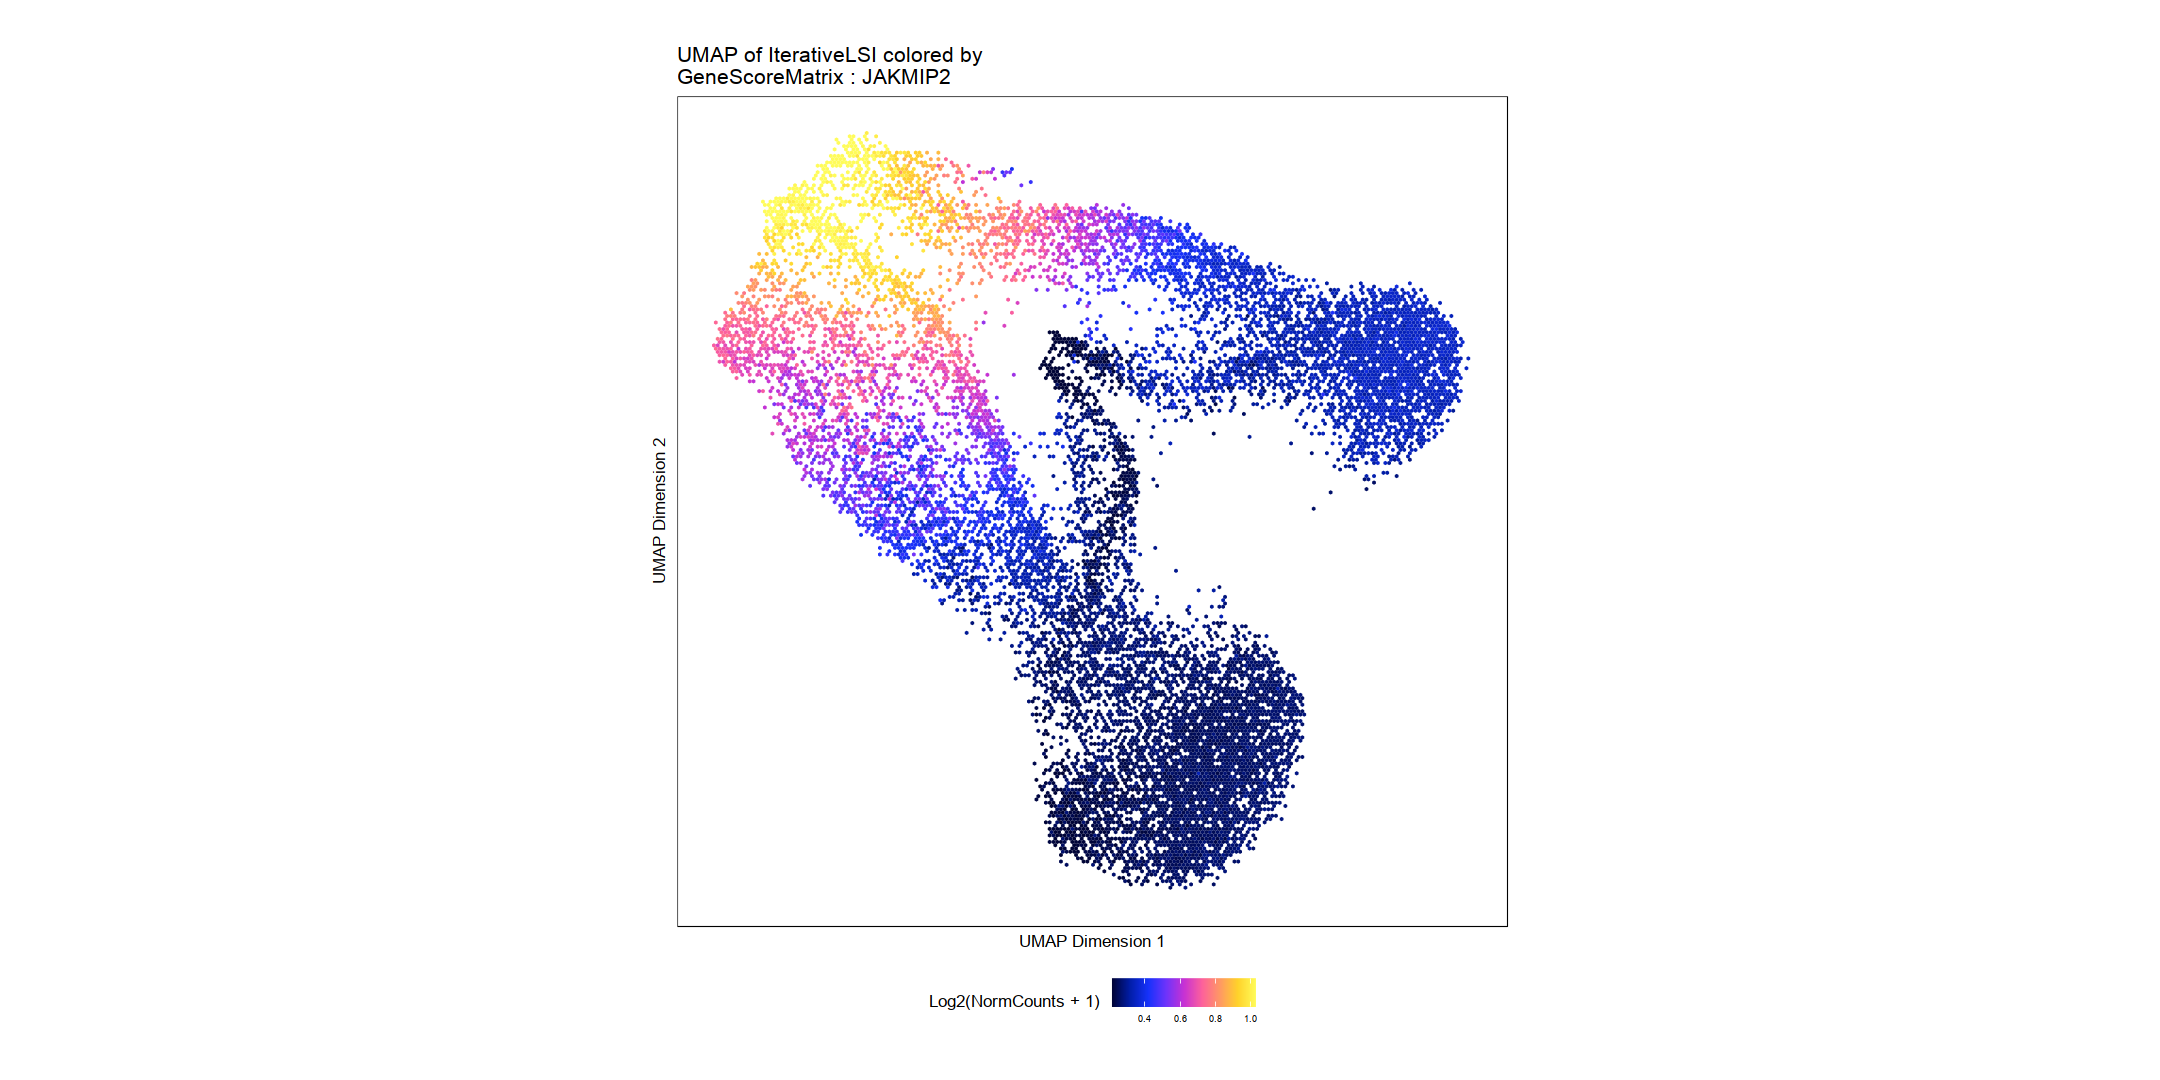

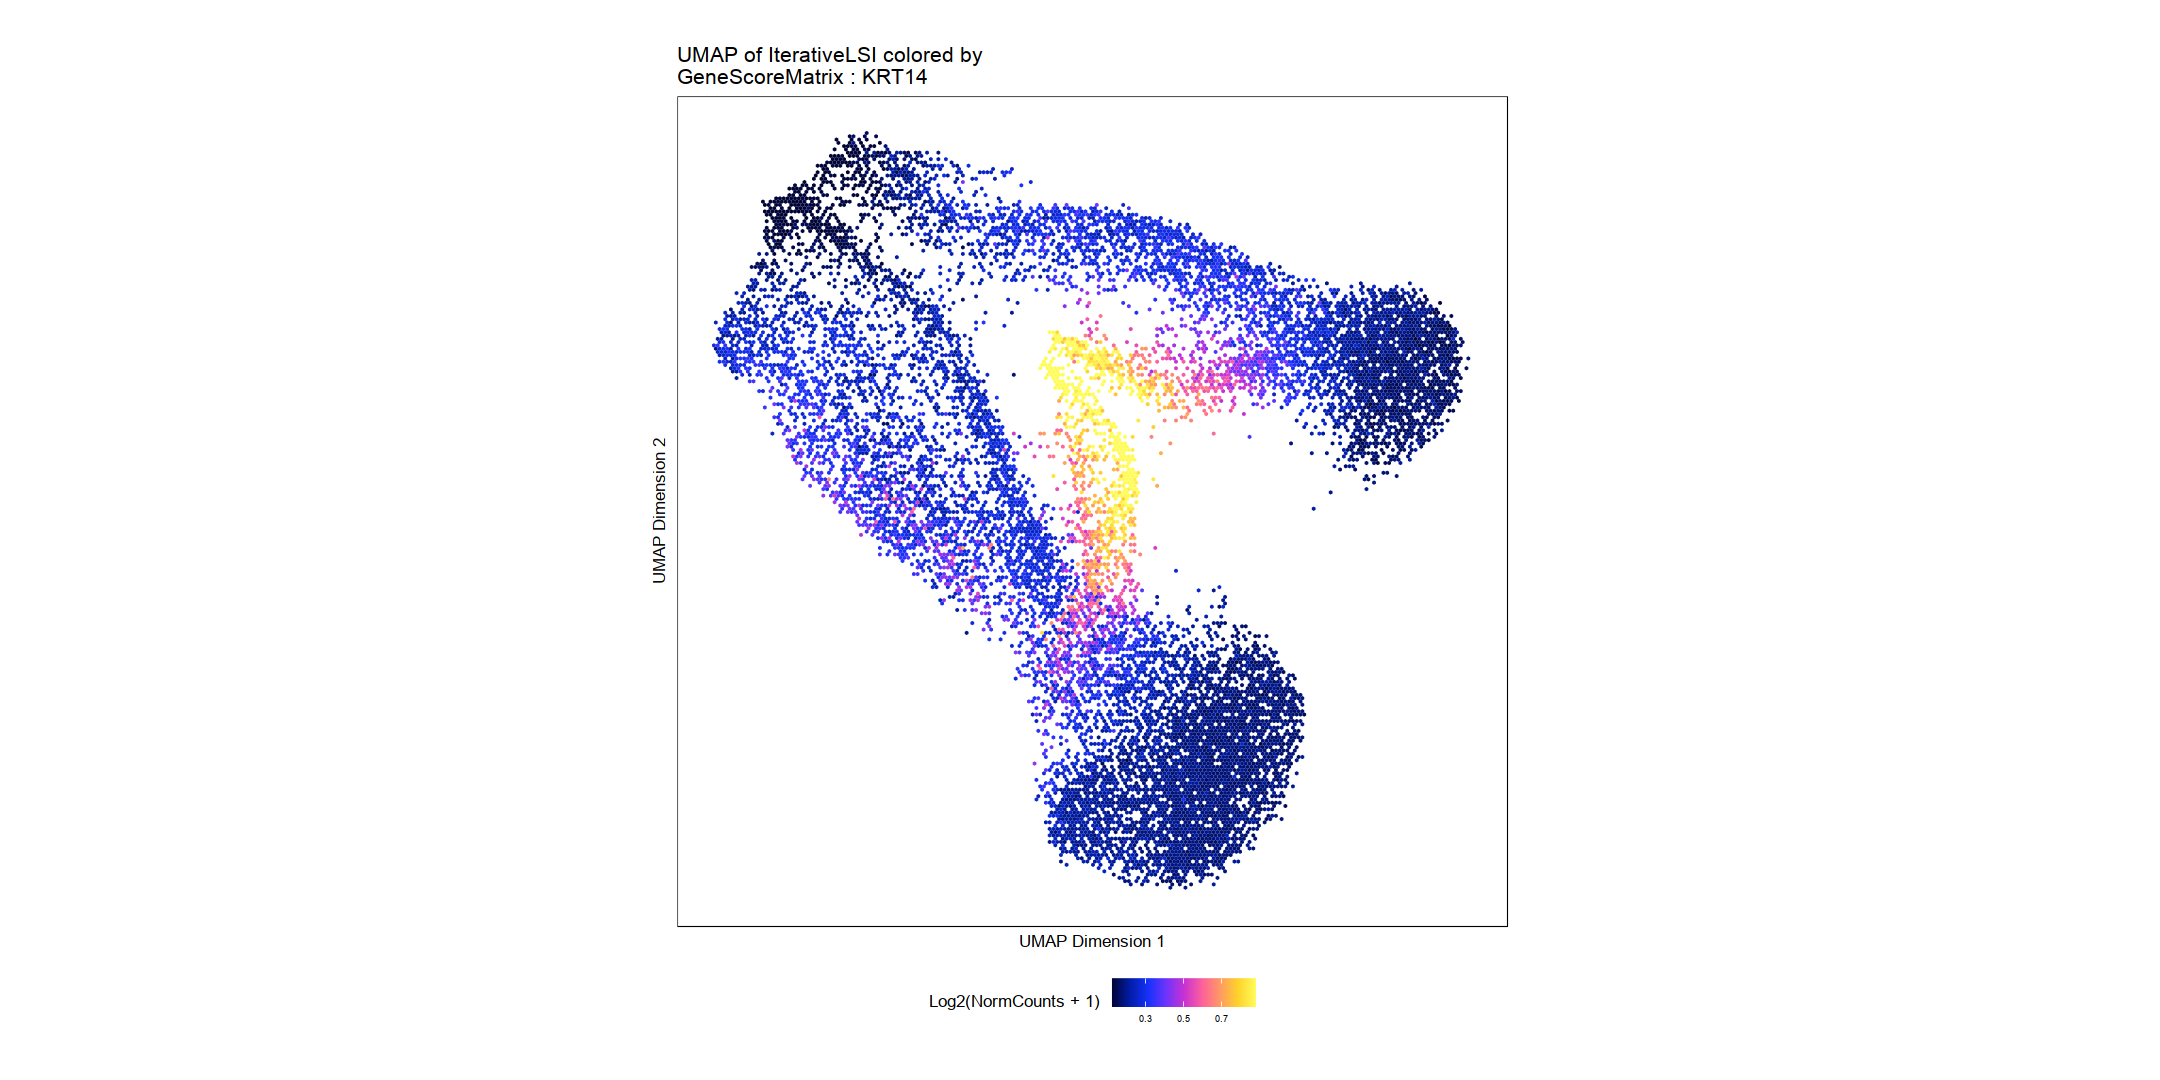

$COL1A1

$MAP2

$JAKMIP2

$KRT14

$KRT6A

$OAS1


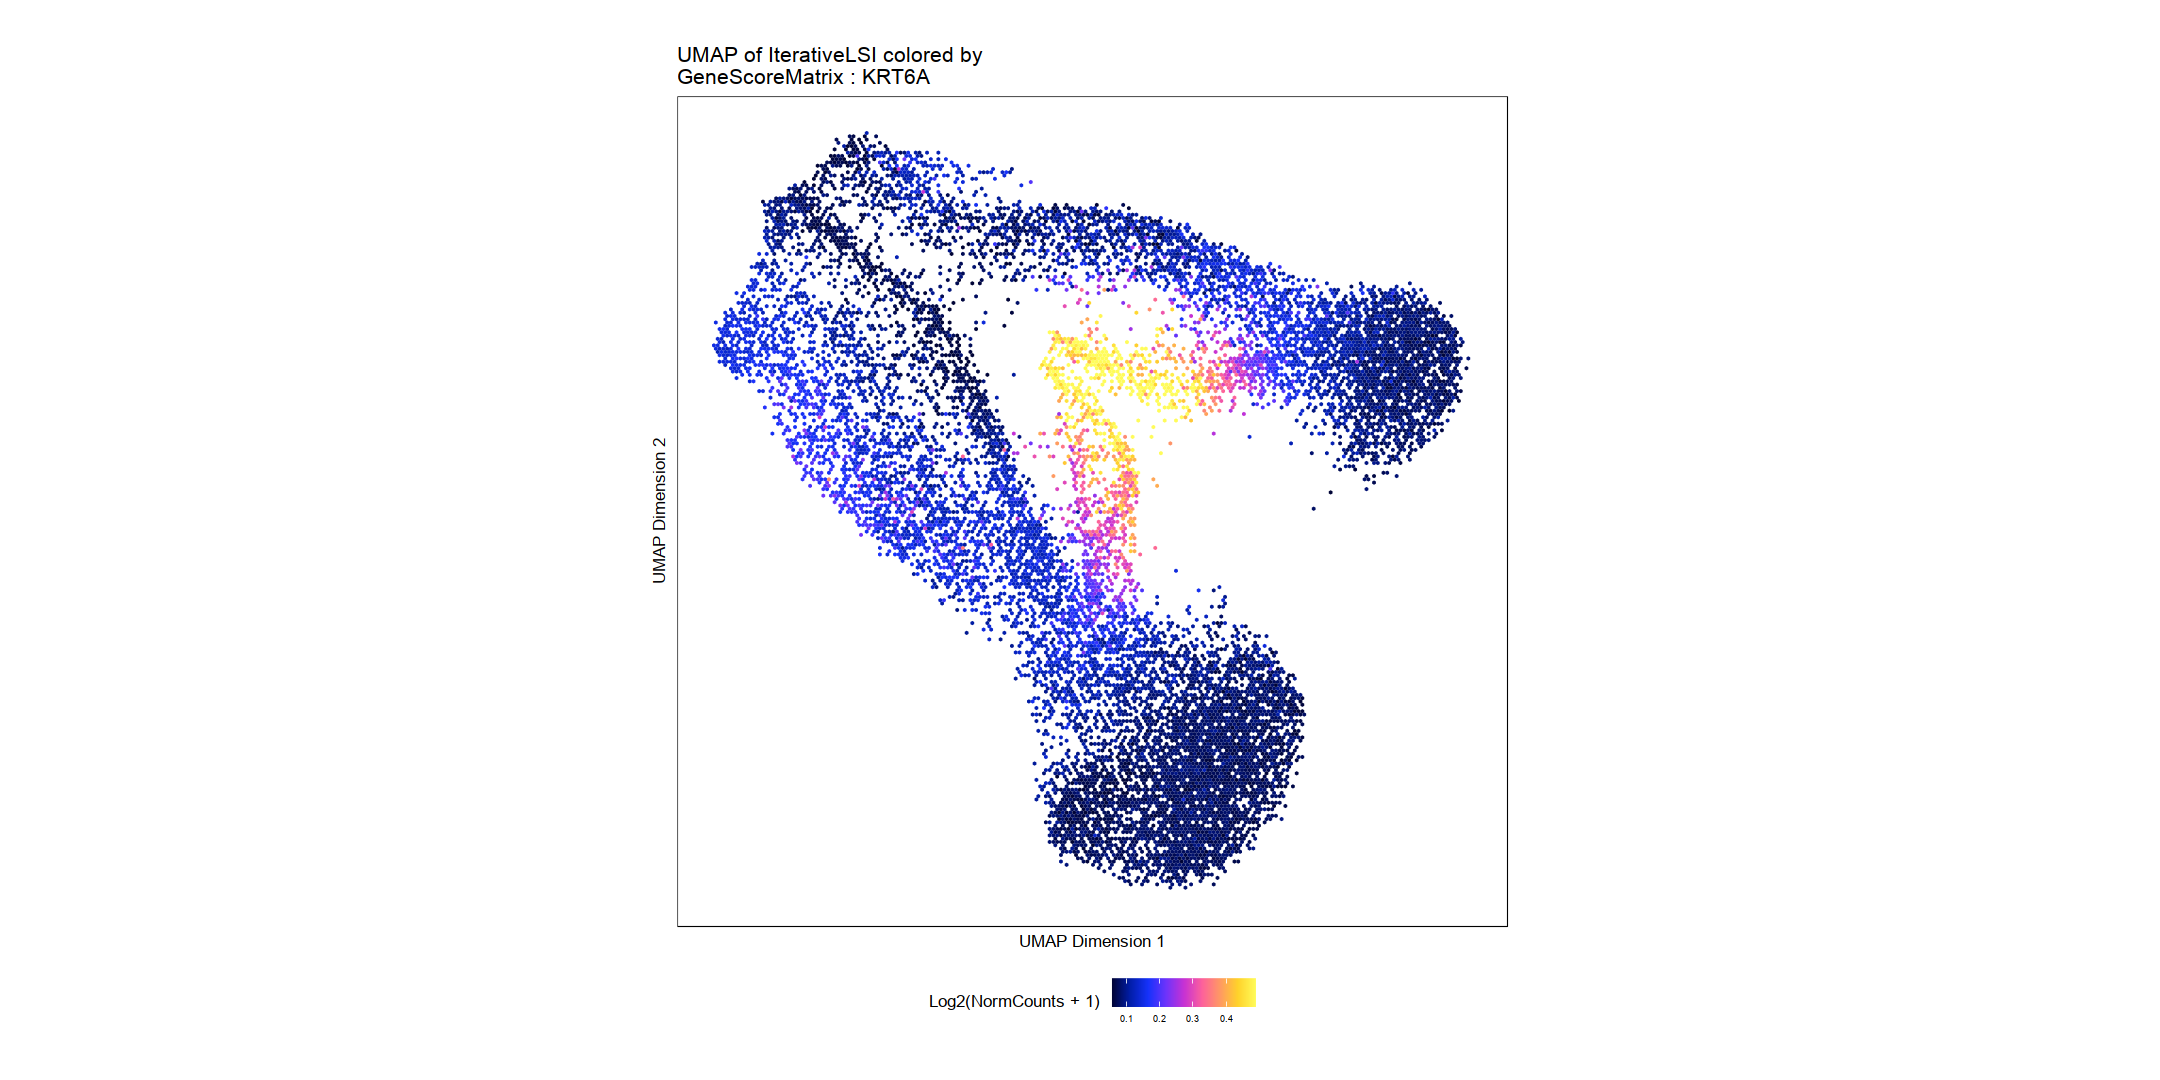

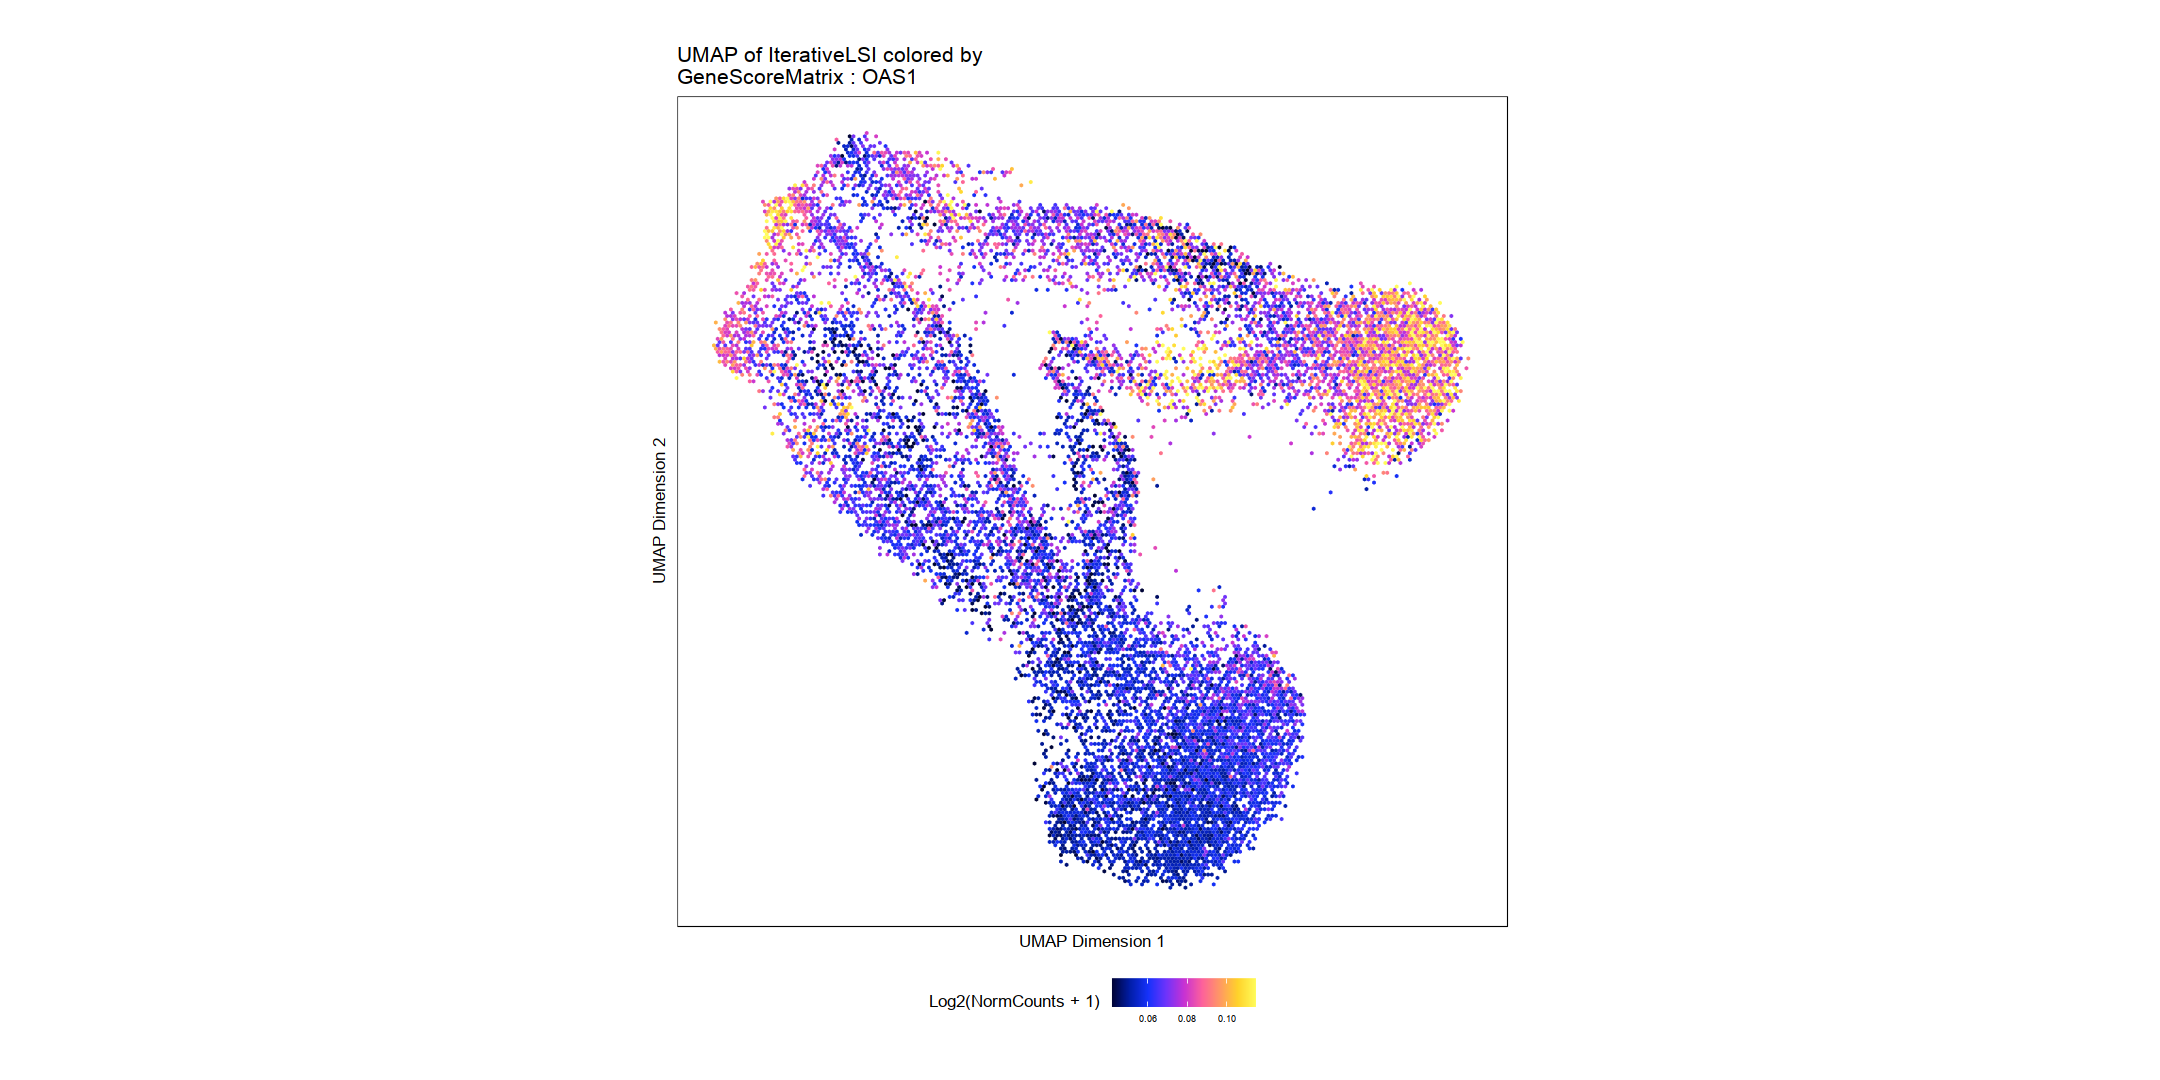

In [76]:
p

In [76]:
p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "Clusters", 
    geneSymbol = "NANOG", 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-d4fa1709d25e-Date-2022-06-07_Time-22-27-50.log
If there is an issue, please report to github with logFile!

2022-06-07 22:27:52 : Validating Region, 0.028 mins elapsed.



GRanges object with 1 range and 2 metadata columns:
      seqnames          ranges strand |     gene_id      symbol
         <Rle>       <IRanges>  <Rle> | <character> <character>
  [1]    chr12 7787794-7799141      + |       79923       NANOG
  -------
  seqinfo: 24 sequences from hg38 genome


2022-06-07 22:27:52 : Adding Bulk Tracks (1 of 1), 0.031 mins elapsed.

2022-06-07 22:27:54 : Adding Gene Tracks (1 of 1), 0.066 mins elapsed.

2022-06-07 22:27:55 : Plotting, 0.078 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-plotBrowserTrack-d4fa1709d25e-Date-2022-06-07_Time-22-27-50.log



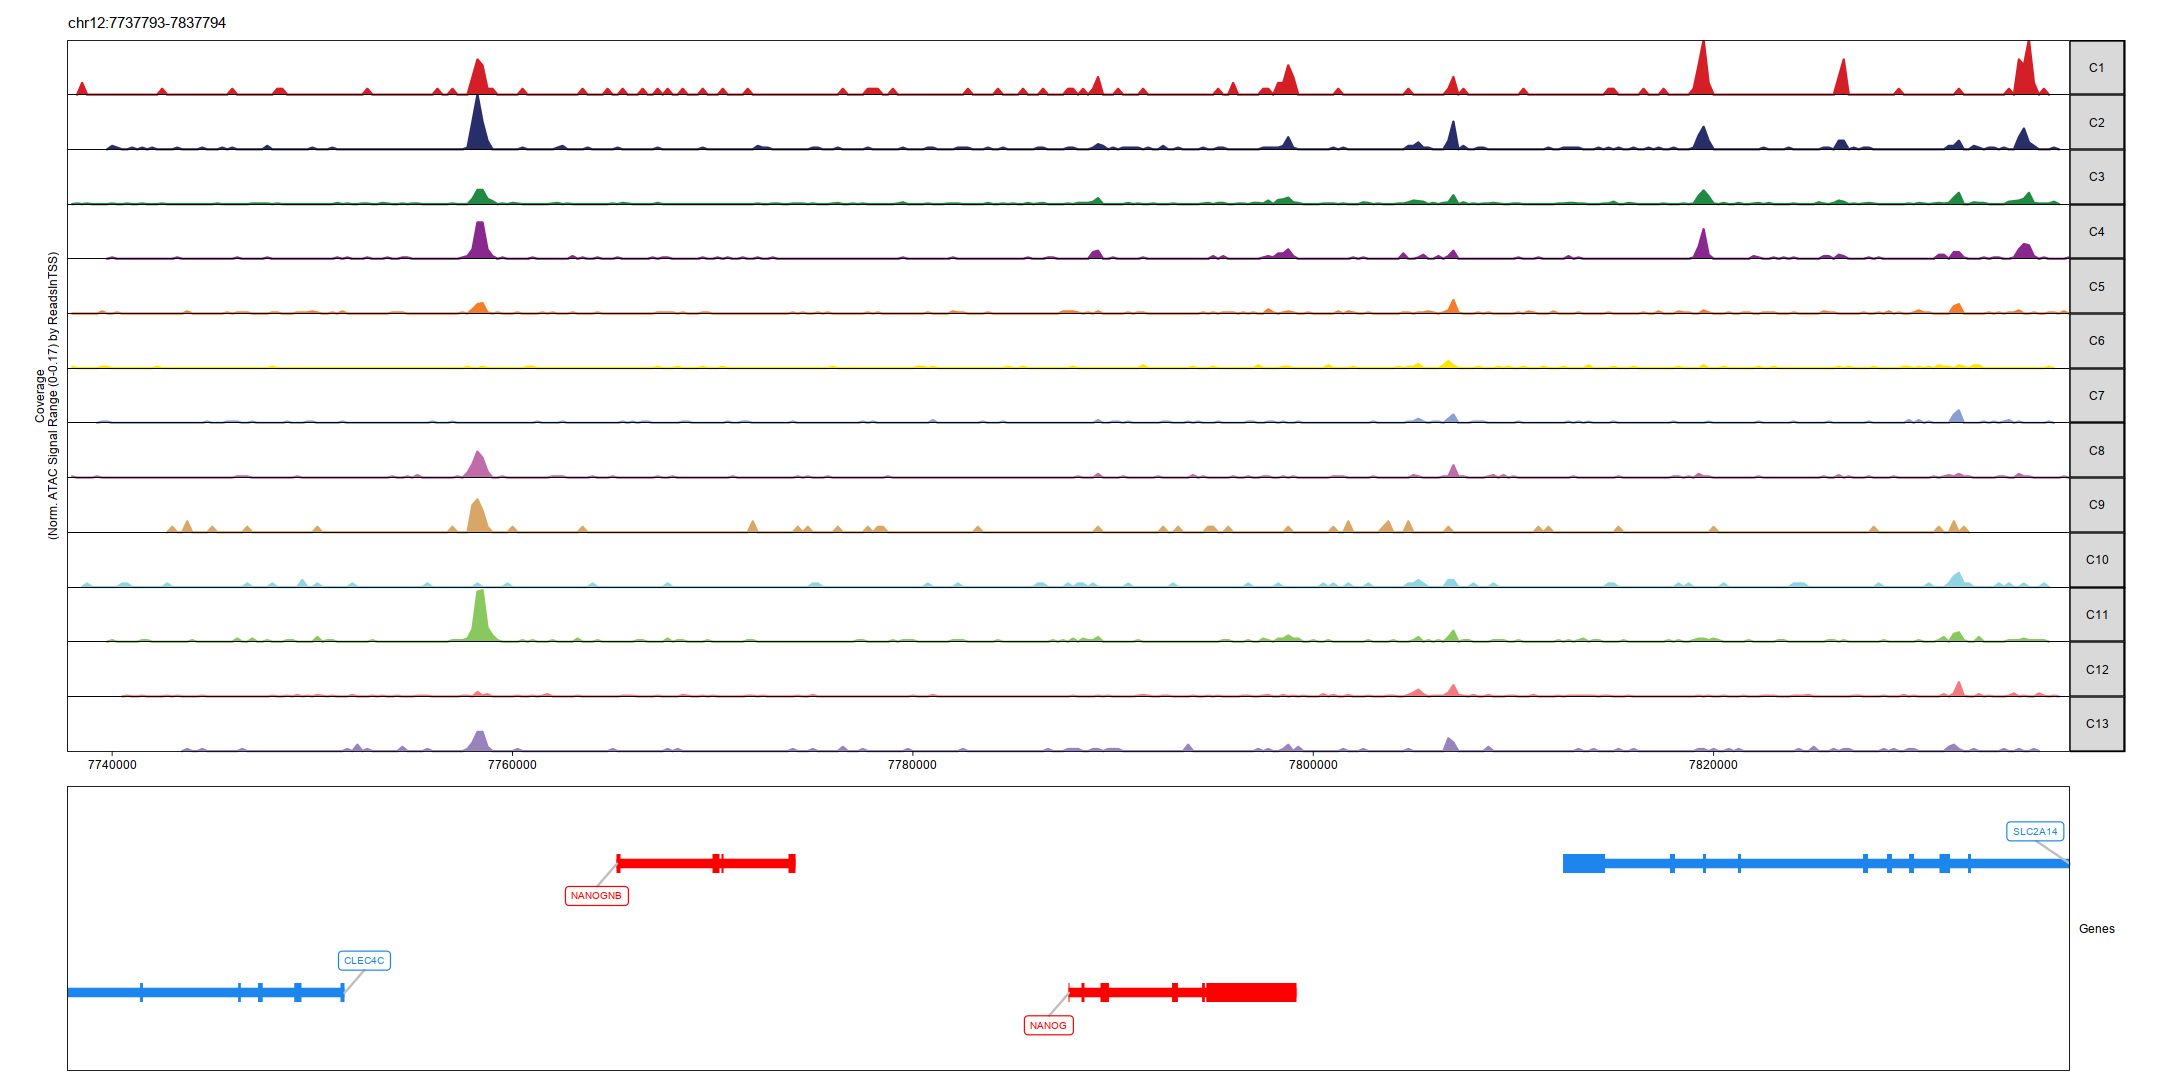

In [77]:
grid::grid.newpage()
grid::grid.draw(p$NANOG)

---

In [78]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gtable_0.3.0                      ggrepel_0.8.2                    
 [3] gridExtra_2.3                     uwot_0.1.8                       
 [5] nabor_0.5.0                       Seurat_3.1.5                     
 [7] BSgenome.Hsapiens.UCSC.hg38_1.4.1 BSgen